In [1]:
import pandas as pd
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<AxesSubplot:xlabel='DATE'>

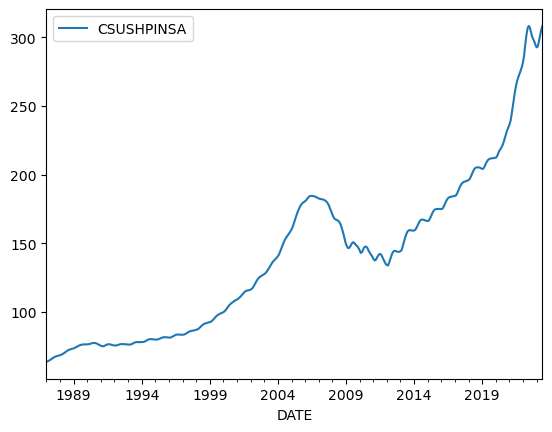

In [5]:
csi = pd.read_csv("./CSUSHPINSA.csv")
csi['DATE'] = pd.to_datetime(csi['DATE'])
csi = csi.set_index("DATE")
csi.plot()

In [6]:
# Dickey-Fuller Test
adf = adfuller(csi.CSUSHPINSA, maxlag = 50)
adf
## The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, with the alternative that there is no unit root. 
# The pvalue is above a critical size, then we cannot reject that there is a unit root

(0.6381960482422293,
 0.9885202183642052,
 31,
 406,
 {'1%': -3.4465596717208813,
  '5%': -2.8686852499495843,
  '10%': -2.570576203741901},
 286.51623227889354)

<AxesSubplot:xlabel='DATE'>

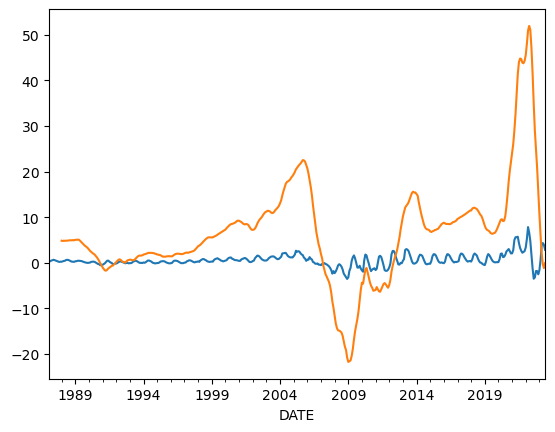

In [7]:
#Defining a function to calculate Percentage Change

def diff(x,numLags):
    y = (x - x.shift(numLags))
    return y
csi[['nums_lag1']] = diff(csi[['CSUSHPINSA']],1)
csi.nums_lag1[1:].plot()
csi[['nums_lag12']] = diff(csi[['CSUSHPINSA']],12
csi.nums_lag12[12:].plot()

In [8]:
# Dickey-Fuller Test
adf = adfuller(csi.nums_lag1[1:])
adf
## The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, with the alternative that there is no unit root. 
# The pvalue is above a critical size, then we cannot reject that there is a unit root

# for lag12,  Dickey-Fuller Test shows unit root exsist, so we use diff1

(-3.478040526604884,
 0.00856929814758257,
 15,
 421,
 {'1%': -3.445978550826048,
  '5%': -2.8684297456394874,
  '10%': -2.570440005247093},
 316.9217100225136)

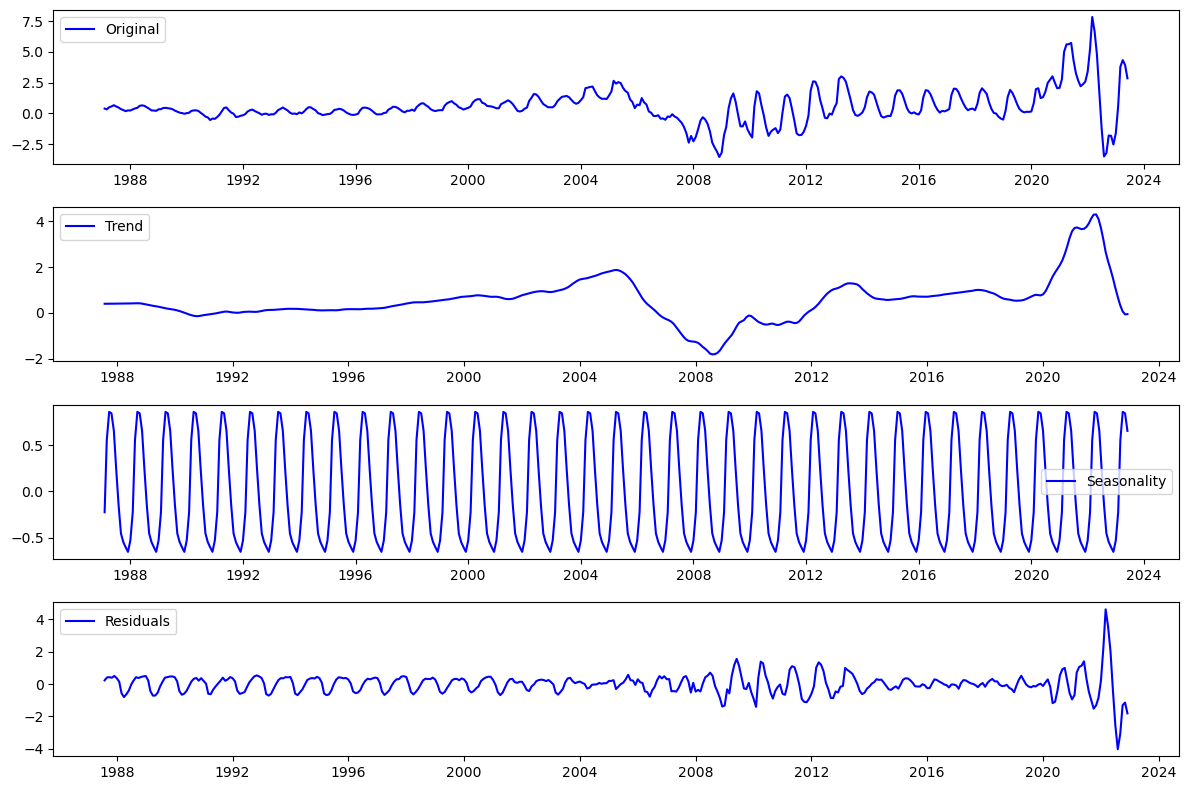

In [16]:
# test if there is any seasonal composition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(csi.nums_lag1[1:], model='additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(csi.nums_lag1[1:], label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

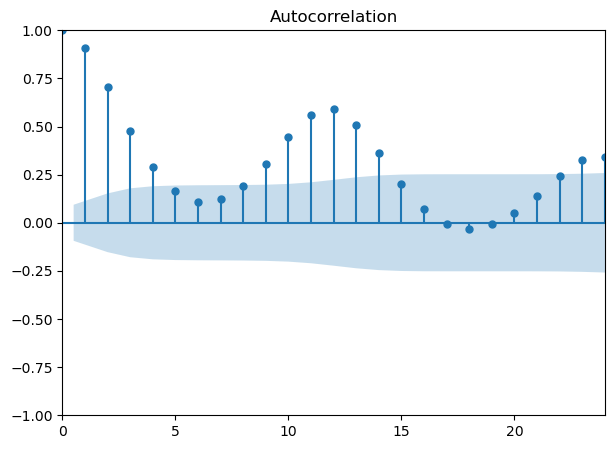

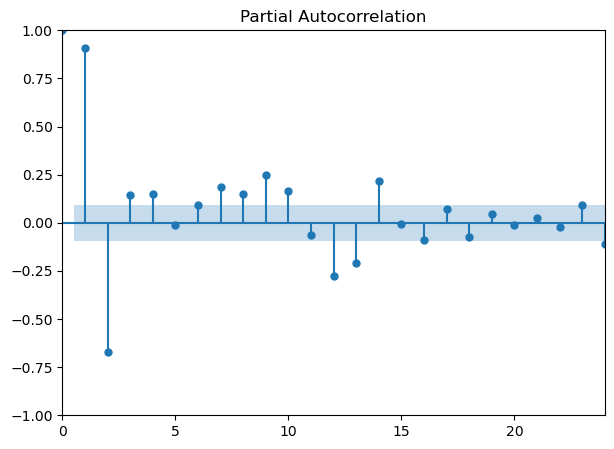

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=7,5
plot_acf(csi.nums_lag1[1:]); plt.xlim(0,24); plt.show()
plot_pacf(csi.nums_lag1[1:]); plt.xlim(0,24); plt.ylim(-1,1);plt.show()

In [20]:
import itertools
p = d = q = range(0,2)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p,d,q))
# Generate all different combinations of seasonal p, d and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]



In [28]:
from statsmodels.tsa.statespace import sarimax
ans = []
for para1 in pdq:
    for para2 in pdqs:
        try:
            mod = sarimax.SARIMAX(csi.nums_lag1[1:],
                            order = para1,
                            seasonal_order = para2,
                            enforce_stationarity = False,
                            enforce_invertibility = False)
            output = mod.fit()
            ans.append([para1, para2, output.aic, output.bic])
            print('Result:' + ' ARIMA {} x {}12 : AIC Calculated = {}'.format(para1, para2, output.aic))
        except:
                continue


/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-pac

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.78589D+00    |proj g|=  1.45580D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      4      1     0     0   1.621D-06   1.786D+00
  F =   1.7858912384735879     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Result: ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1562.8689424259157
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10


/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.47103D+00    |proj g|=  7.63009D-02

At iterate    5    f=  1.43844D+00    |proj g|=  2.08456D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     11      1     0     0   5.553D-07   1.438D+00
  F =   1.4384361024455692     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Result: ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1261.1931535374274
RUNNING THE L-BFGS-B CODE

           * * *

Machine

/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-pac

Result: ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1279.6123560457554
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46769D+00    |proj g|=  6.58000D-02


/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  1.41248D+00    |proj g|=  8.37298D-02

At iterate   10    f=  1.40537D+00    |proj g|=  4.45459D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     23      1     0     0   4.455D-06   1.405D+00
  F =   1.4053663418854325     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Result: ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1234.290182807868
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.74919D+00    |proj g|=  6.2

/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     13      1     0     0   5.571D-07   1.010D+00
  F =   1.0100867855496842     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Result: ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 888.815850570424
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29362D+00    |proj g|=  6.93436D-01

At iterate    5    f=  1.01336D+00    |proj g|=  3.21401D-02

           * * *

Tit   = total number of iterations


/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  9.73350D-01    |proj g|=  1.06388D-01

At iterate   10    f=  9.57534D-01    |proj g|=  3.50320D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     14      1     0     0   1.207D-06   9.575D-01
  F =  0.95753387885709329     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Result: ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 842.8846101210995
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66562D+00    |proj g|=  6.7

/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65880D+00    |proj g|=  6.75146D-01

At iterate    5    f=  9.47135D-01    |proj g|=  2.71178D-03

At iterate   10    f=  9.47129D-01    |proj g|=  9.78211D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     20      1     0     0   1.733D-06   9.471D-01
  F =  0.94712840763238393     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Result: ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 835.7902282707036
RUNNING THE L-BFGS-B CODE

         

/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     11      1     0     0   4.176D-07   9.884D-01
  F =  0.98843246002968810     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Result: ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 869.8899700659474


/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26456D+00    |proj g|=  6.60536D-01

At iterate    5    f=  9.90820D-01    |proj g|=  2.74414D-02

At iterate   10    f=  9.52890D-01    |proj g|=  1.99653D-01

At iterate   15    f=  9.27833D-01    |proj g|=  6.67133D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     30      1     0     0   1.522D-05   9.278D-01
  F =  0.92782743078120800     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Result: 

/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-pac

Result: ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 598.2188525557309
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93842D-01    |proj g|=  7.23074D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      5      1     0     0   5.027D-05   5.936D-01
  F =  0.59358639351832521     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Result: ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 520.7945079350162
RUNNING THE L-BFGS-B CODE

         

 This problem is unconstrained.
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  4.95132D-01    |proj g|=  1.74550D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     12      1     0     0   1.637D-07   4.951D-01
  F =  0.49511828363826821     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Result: ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 436.7333798998464
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.58063D-01    |proj g|=  5.24509D-05


/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._i


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     17      1     0     0   5.245D-05   5.581D-01
  F =  0.55806286929488091     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Result: ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 491.7469477637259
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.17771D-01    |proj g|=  2.67333D-01

At iterate    5    f=  4.98986D-01    |proj g|=  1.08537D-01

At iterate   10    f=  4.97393D-01    |proj g|=  1.1


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if isinstance(retvals, dict):

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This prob


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     53      2     0     0   1.192D-05   4.974D-01
  F =  0.49739299601323639     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Result: ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 440.7214785155686
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.16293D-01    |proj g|=  3.97069D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Result: ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 455.24042968390205
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.14214D-01    |proj g|=  1.33288D-01

At iterate    5    f=  5.07647D-01    |proj g|=  1.27011D-01

At iterate   10    f=  4.97959D-01    |proj g|=  6.41640D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     16      1     0     0   2.554D-06   4.980D-01
  F =  0.49795887941906736     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL   

/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7      9      1     0     0   1.910D-07   6.627D-01
  F =  0.66272519399274010     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Result: ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 583.2218195496548
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.11109D-01    |proj g|=  5.74174D-01

At iterate    5    f=  5.44858D-01    |proj g|=  5.01485D-02

At iterate   10    f=  5.43939D-01    |proj g|=  5.2

/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates,


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     37      2     0     0   1.496D-05   5.256D-01
  F =  0.52559933034447992     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Result: ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 463.3738147210754
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.30171D-01    |proj g|=  3.77302D-01

At iterate    5    f=  4.06451D-01    |proj g|=  5.27319D-02

           * * *

Tit   = total number of iterations

/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Result: ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 414.1910209670386
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.65980D-01    |proj g|=  7.99991D-01

At iterate    5    f=  4.17686D-01    |proj g|=  6.87374D-02


/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  4.07091D-01    |proj g|=  7.79794D-02

At iterate   15    f=  4.06698D-01    |proj g|=  3.81291D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     19      1     0     0   1.816D-05   4.067D-01
  F =  0.40669784687769162     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Result: ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 363.4539181711025
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.53759D-01    |proj g|=  2.7

/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  4.42779D-01    |proj g|=  6.37764D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     12      1     0     0   9.809D-06   4.428D-01
  F =  0.44277840643639321     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Result: ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 392.98832722540766
RUNNING THE L-BFGS-B CODE

           * * *



/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.49204D-01    |proj g|=  2.83230D-01

At iterate    5    f=  4.27008D-01    |proj g|=  9.92000D-02

At iterate   10    f=  4.08000D-01    |proj g|=  4.96435D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     20      1     0     0   4.274D-05   4.080D-01
  F =  0.40799853068558445     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Result: ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 364.5907158192008
RUNNING THE L-BFGS-B CODE

         

/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._i


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     12      1     0     0   1.305D-07   6.632D-01
  F =  0.66315129653143912     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Result: ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 585.5942331684778
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.74981D-01    |proj g|=  5.42792D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total nu

/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.13241D-01    |proj g|=  4.16170D-01

At iterate    5    f=  4.79313D-01    |proj g|=  4.89956D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     13      1     0     0   1.759D-05   4.792D-01
  F =  0.47919771503538833     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Result: ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 424.8188029409294
RUNNING THE L-BFGS-B CODE

           * * *

Machine 

/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.38814D-01    |proj g|=  7.38142D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     11      1     0     0   2.204D-06   5.388D-01
  F =  0.53881412259107708     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Result: ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 476.9235431446014
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.22495D-01    |proj g|=  6.70235D-01

At iterate    5    f=  5.21446D-01    |proj g|=  1.4

/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.34781D-01    |proj g|=  2.13576D-01

At iterate    5    f=  5.00879D-01    |proj g|=  6.09380D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     10      1     0     0   1.302D-05   5.009D-01
  F =  0.50087895074748745     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Result: ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 443.768202953304
RUNNING THE L-BFGS-B CODE

           * * *

Machine p

/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  4.99730D-01    |proj g|=  3.46712D-02

At iterate   10    f=  4.82074D-01    |proj g|=  3.04220D-02

At iterate   15    f=  4.81975D-01    |proj g|=  1.41532D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     20      1     0     0   1.415D-06   4.820D-01
  F =  0.48197491616022681     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Result: ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 429.24607672403823
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at t

/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33702D-01    |proj g|=  1.62393D+00

At iterate    5    f=  5.15847D-01    |proj g|=  2.71768D-02

At iterate   10    f=  5.15597D-01    |proj g|=  1.85560D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     15      1     0     0   1.468D-06   5.156D-01
  F =  0.51559729610867722     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Result: ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 458.63203

/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.47952D-01    |proj g|=  4.37786D-01

At iterate    5    f=  3.90161D-01    |proj g|=  1.31620D-01

At iterate   10    f=  3.82304D-01    |proj g|=  4.72180D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     15      1     0     0   3.485D-06   3.823D-01
  F =  0.38230397468185190     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Result: ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 342.13367

/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  4.37844D-01    |proj g|=  1.28026D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     11      1     0     0   2.048D-05   4.378D-01
  F =  0.43775974175158766     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Result: ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 390.6020142908876
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.04232D-01    |proj g|=  1.59014D+00

At iterate    5    f=  4.37375D-01    |proj g|=  8.4

/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Result: ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 374.8937717979483
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.46857D-01    |proj g|=  4.54577D-01


/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  4.17936D-01    |proj g|=  4.33139D-02

At iterate   10    f=  3.88851D-01    |proj g|=  1.04178D-01

At iterate   15    f=  3.83458D-01    |proj g|=  1.36936D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     25      1     0     0   1.417D-06   3.835D-01
  F =  0.38345835530565631     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Result: ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 345.1426025371436
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at th

/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._i


At iterate    5    f=  5.20466D-01    |proj g|=  1.40623D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     12      1     0     0   8.110D-06   5.205D-01
  F =  0.52046511940726881     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Result: ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 460.8865143619529
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.05191D-01    |proj g|=  6.04695D-05


/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     11      1     0     0   6.436D-05   5.052D-01
  F =  0.50519147125896546     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Result: ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 445.5373458803358
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.05066D-01    |proj g|=  4.23853D-01

At iterate    5    f=  3.84165D-01    |proj g|=  9.81389D-02

At iterate   10    f=  3.83709D-01    |proj g|=  2.3

/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     24      1     0     0   3.613D-05   4.418D-01
  F =  0.44182377685264479     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Result: ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 392.15398096921155
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.49864D-01    |proj g|=  7.70230D-01


/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.91886D-01    |proj g|=  6.03596D-02

At iterate   10    f=  3.84622D-01    |proj g|=  8.52306D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     19      1     0     0   3.173D-05   3.846D-01
  F =  0.38461363423406730     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Result: ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 344.1523163205748


/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.24394D-01    |proj g|=  3.26034D-01

At iterate    5    f=  4.19015D-01    |proj g|=  1.40983D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if isinstance(retvals, dict):

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     50      2     0     0   6.640D-05   4.190D-01
  F =  0.41901465012338229     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Result: ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 372.2188042078361
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.20741D-01    |proj g|=  3.44210D-01


 This problem is unconstrained.



At iterate    5    f=  3.96592D-01    |proj g|=  9.34740D-02

At iterate   10    f=  3.86393D-01    |proj g|=  3.20546D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     22      1     0     0   4.867D-06   3.864D-01
  F =  0.38639274108745758     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Result: ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 345.70725571043795
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.18638D-01    |proj g|=  6.

/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.18366D-01    |proj g|=  1.59148D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     13      1     0     0   2.224D-05   6.184D-01
  F =  0.61836497332345830     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Result: ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 546.4509866847026
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.25717D-01    |proj g|=  3.98614D-01

At iterate    5    f=  5.10739D-01    |proj g|=  3.4

/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Result: ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 447.31239984552496
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.05359D-01    |proj g|=  4.29559D-01

At iterate    5    f=  3.83221D-01    |proj g|=  1.00714D-01

At iterate   10    f=  3.82137D-01    |proj g|=  5.69570D-03

At iterate   15    f=  3.82128D-01    |proj g|=  2.60880D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     20      1     0     0   2.609D-05   3.821D-01
  F =  0.3821280040811

/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



At iterate    5    f=  4.40672D-01    |proj g|=  2.11264D-02

At iterate   10    f=  4.40170D-01    |proj g|=  7.47724D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     13      1     0     0   7.477D-06   4.402D-01
  F =  0.44016985823287463     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Result: ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 392.7084560955324
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.56119D-01    |proj g|=  7.0

 This problem is unconstrained.



At iterate    5    f=  3.91361D-01    |proj g|=  5.19000D-02

At iterate   10    f=  3.82773D-01    |proj g|=  3.54395D-02

At iterate   15    f=  3.82509D-01    |proj g|=  1.90788D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     25      1     0     0   7.601D-06   3.825D-01
  F =  0.38249485361421959     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Result: ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 344.30050205882793
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at t

/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  4.18976D-01    |proj g|=  1.01758D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     11      1     0     0   3.231D-06   4.190D-01
  F =  0.41897545465131503     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Result: ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 374.18454736524933
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.21010D-01    |proj g|=  3.50458D-01


/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  4.10745D-01    |proj g|=  1.04564D-01

At iterate   10    f=  3.85271D-01    |proj g|=  1.12628D-01

At iterate   15    f=  3.84431D-01    |proj g|=  3.37106D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     25      1     0     0   1.049D-06   3.844D-01
  F =  0.38442937841961239     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Result: ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 345.99127673874125


In [30]:
result = pd.DataFrame(ans, columns = ['pdq','pdqs','AIC'])
# Sort by lowest AIC to find the best parameters


In [46]:
result.sort_values(by = 'AIC').head(10)

,pdq,pdqs,AIC
51,"(1, 1, 0)","(0, 1, 1, 12)",341.361448
59,"(1, 1, 1)","(0, 1, 1, 12)",341.979876
43,"(1, 0, 1)","(0, 1, 1, 12)",342.133674
53,"(1, 1, 0)","(1, 0, 1, 12)",344.152316
61,"(1, 1, 1)","(1, 0, 1, 12)",344.300502
45,"(1, 0, 1)","(1, 0, 1, 12)",344.869779
47,"(1, 0, 1)","(1, 1, 1, 12)",345.142603
55,"(1, 1, 0)","(1, 1, 1, 12)",345.707256
63,"(1, 1, 1)","(1, 1, 1, 12)",345.991277
27,"(0, 1, 1)","(0, 1, 1, 12)",361.102573


In [44]:
mod = sarimax.SARIMAX(csi.nums_lag1[1:],
                            order = (1, 1, 0),
                            seasonal_order = (0, 1, 1, 12)	,
                            enforce_stationarity = False,
                            enforce_invertibility = False)
output = mod.fit()


/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/liziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.05066D-01    |proj g|=  4.23853D-01

At iterate    5    f=  3.84165D-01    |proj g|=  9.81389D-02

At iterate   10    f=  3.83709D-01    |proj g|=  2.31822D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     15      1     0     0   9.153D-06   3.837D-01
  F =  0.38370875080702188     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                      SARIMAX Results                 

In [45]:
print(output.summary())

                                      SARIMAX Results                                       
Dep. Variable:                            nums_lag1   No. Observations:                  437
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -167.681
Date:                              Tue, 12 Sep 2023   AIC                            341.361
Time:                                      00:08:21   BIC                            353.417
Sample:                                  02-01-1987   HQIC                           346.131
                                       - 06-01-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4624      0.018     25.762      0.000       0.427       0.498
ma.S.L12      -0.65

<AxesSubplot:xlabel='DATE'>

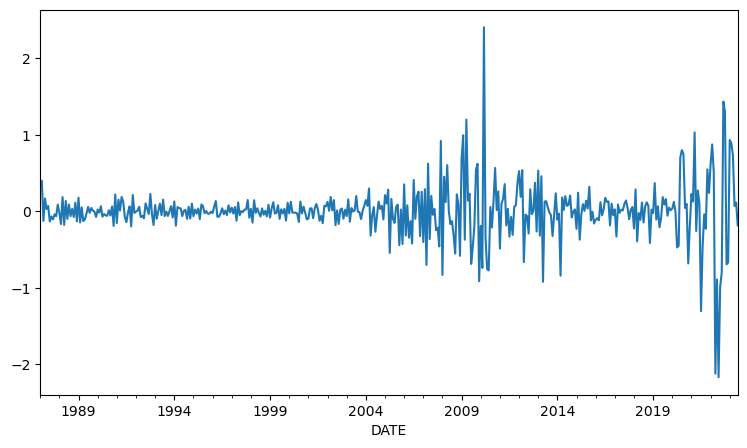

In [64]:
csi['predict'] = output.predict()
csi['residual'] = csi['nums_lag1'] - csi['predict']
rcParams['figure.figsize']=9,5
csi.residual.plot()

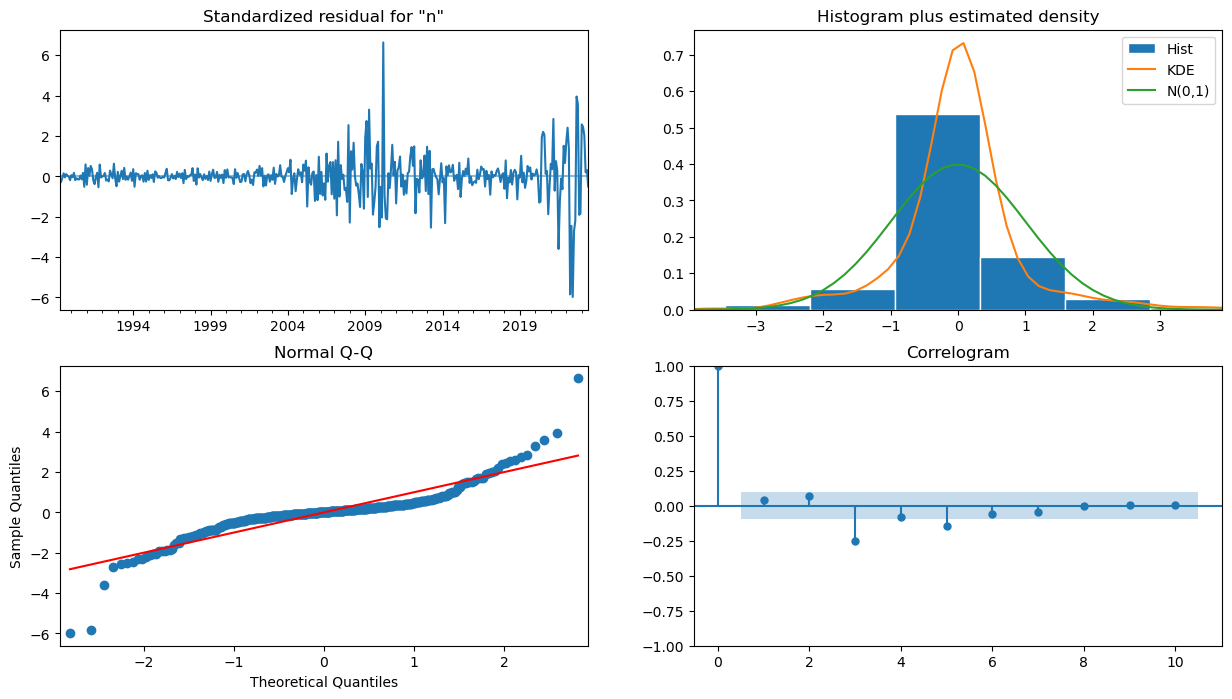

In [53]:
# plot residual analysis
rcParams['figure.figsize']=15,8
fig_ll = output.plot_diagnostics()